# Bayes Theorem

## Probability to predict the rain

In [104]:
P_rain = 0.2
P_no_rain=1-P_rain
P_Clouds_given_rain=0.8
P_Clouds_given_no_rain=0.4
P_Clouds = (P_Clouds_given_rain * P_rain) + (P_Clouds_given_no_rain * P_no_rain)


#Bayes’ theorem to compute Probablity of rain given there are clouds
P_rain_given_clouds = (P_Clouds_given_rain * P_rain)/P_Clouds
print("Probability that you will use an umbrella today with the cloud factor- There are clouds: ",round(P_rain_given_clouds,2))

Probability that you will use an umbrella today with the cloud factor- There are clouds:  0.33


## Hunger Satisfaction
The hunger satisfaction model is a simple model that predicts the probability of a person being satisfied with their hunger level. The model is based on the idea that a person's hunger level.

H: You're hungry (this is our evidence).
CCC: Cooking is a good choice.
OOO: Ordering out is a good choice.
FFF: Food at home is a good choice.
GOE: Go out to eat

P(CCC|OOO|FFF|GOE)



 .

### Write code to predict the defaulter using **"CCSPEND.CSV"**

In [116]:
import pandas as pd
pd.set_option("display.max_column", None)

df = pd.read_csv("./ccspend.csv")

df.head(5)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             150000 non-null  int64  
 1   CCTYPE         150000 non-null  object 
 2   CCNO           150000 non-null  int64  
 3   TOTALSPEND%    150000 non-null  int64  
 4   Max Limit      150000 non-null  int64  
 5   Amount Due     150000 non-null  float64
 6   PaymentStatus  150000 non-null  object 
 7   Remarks        150000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 9.2+ MB


In [106]:
# Define defaulter criteria based on PaymentStatus
defaulter_statuses = ["Pending", "Partial", "Absconding", "Dead"]
df["IsDefaulter"] = df["PaymentStatus"].apply(
    lambda x: 1 if x in defaulter_statuses else 0
)

# Calculate probabilities
P_defaulter = df["IsDefaulter"].mean()  # Probability of being a defaulter
P_non_defaulter = 1 - P_defaulter  # Probability of not being a defaulter


def calculate_probability(feature_col, threshold):
    # Probability of the feature being above the threshold
    P_feature = (df[feature_col] > threshold).mean()

    # Probability of feature given defaulter
    P_feature_given_defaulter = (
        df[df["IsDefaulter"] == 1][feature_col].apply(lambda x: x > threshold).mean()
    )

    # Bayes theorem: P(defaulter | feature) = (P(feature | defaulter) * P(defaulter)) / P(feature)
    P_defaulter_given_feature = (
        (P_feature_given_defaulter * P_defaulter) / P_feature if P_feature > 0 else 0
    )  # Avoid division by zero

    return P_defaulter_given_feature


# Example usage for a feature: "TOTALSPEND%" with a threshold of 20
feature_name = "TOTALSPEND%"
threshold_value = 20
probability = calculate_probability(feature_name, threshold_value)

print(
    f"Probability of being a defaulter given {feature_name} > {threshold_value}: {probability:.2f}"
)

Probability of being a defaulter given high spend (> 20%): 0.67


In [124]:
# Define defaulter criteria based on PaymentStatus
defaulter_statuses = ["Pending", "Partial", "Absconding", "Dead"]
df["IsDefaulter"] = df["PaymentStatus"].apply(
    lambda x: 1 if x in defaulter_statuses else 0
)

# Calculate probabilities
P_defaulter = df["IsDefaulter"].mean()  # Probability of being a defaulter
P_non_defaulter = 1 - P_defaulter  # Probability of not being a defaulter


def calculate_probability(feature_cols, thresholds):
    probabilities = {}

    for feature_col, threshold in zip(feature_cols, thresholds):
        # Probability of the feature being above the threshold
        P_feature = (df[feature_col] > threshold).mean()

        # Probability of feature given defaulter
        P_feature_given_defaulter = (
            df[df["IsDefaulter"] == 1][feature_col]
            .apply(lambda x: x > threshold)
            .mean()
        )

        # Bayes theorem: P(defaulter | feature) = (P(feature | defaulter) * P(defaulter)) / P(feature)
        P_defaulter_given_feature = (
            (P_feature_given_defaulter * P_defaulter) / P_feature
            if P_feature > 0
            else 0
        )  # Avoid division by zero

        probabilities[feature_col] = P_defaulter_given_feature

    return probabilities

amtMean = df["Amount Due"].mean()
lmtmean = df["Max Limit"].mean()

# Example usage for multiple features
feature_names = ["TOTALSPEND%", "Amount Due", "Max Limit"]
threshold_values = [20, amtMean, lmtmean]  # Adjust thresholds as needed

probabilities = calculate_probability(feature_names, threshold_values)

# Print the probabilities for each feature
for feature, prob in probabilities.items():
    print(
        f"Probability of being a defaulter given {feature} > {threshold_values[feature_names.index(feature)]:.2f}: {prob:.2f}"
    )

Probability of being a defaulter given TOTALSPEND% > 20.00: 0.67
Probability of being a defaulter given Amount Due > 750587.52: 0.67
Probability of being a defaulter given Max Limit > 2503841.29: 0.67


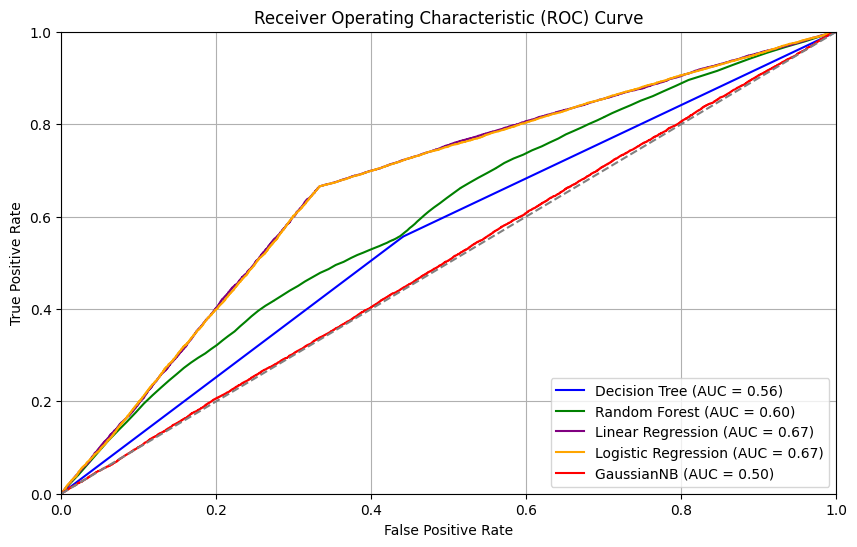

Decision Tree Classifier Accuracy: 0.5577333333333333
ROC AUC Score: 0.557756614465803
              precision    recall  f1-score   support

           0       0.56      0.56      0.56     22529
           1       0.56      0.56      0.56     22471

    accuracy                           0.56     45000
   macro avg       0.56      0.56      0.56     45000
weighted avg       0.56      0.56      0.56     45000

Random Forest Classifier Accuracy: 0.5602666666666667
ROC AUC Score: 0.6021838695044627
              precision    recall  f1-score   support

           0       0.56      0.57      0.56     22529
           1       0.56      0.56      0.56     22471

    accuracy                           0.56     45000
   macro avg       0.56      0.56      0.56     45000
weighted avg       0.56      0.56      0.56     45000

Linear Regression Accuracy: 0.6659777777777778
ROC AUC Score: 0.6689012721895702
              precision    recall  f1-score   support

           0       0.67      0.67  

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score,
    roc_curve,
    auc,
)

# Define target column based on PaymentStatus
df["Default"] = df["PaymentStatus"].apply(
    lambda x: 1 if x in ["Pending", "Absconding", "Dead"] else 0
)

# Encode categorical columns
label_encoder = LabelEncoder()
df["CCTYPE"] = label_encoder.fit_transform(df["CCTYPE"])

# Define feature set and target variable
X = df[["CCTYPE", "TOTALSPEND%", "Max Limit", "Amount Due"]]
y = df["Default"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100
)

# Train the classifiers
clfD = DecisionTreeClassifier(random_state=100)
clfD.fit(X_train, y_train)

clfR = RandomForestClassifier(random_state=100)
clfR.fit(X_train, y_train)

linR = LogisticRegression(
    random_state=100
)  # Changed to LogisticRegression for binary classification
linR.fit(X_train, y_train)

linR_model = LinearRegression()
linR_model.fit(X_train, y_train)

GaussB = GaussianNB()
GaussB.fit(X_train, y_train)

# Predictions
y_predD = clfD.predict(X_test)
y_predR = clfR.predict(X_test)
y_predL_prob = linR.predict_proba(X_test)[:, 1]  # Get predicted probabilities
y_predGNB = GaussB.predict(X_test)
y_predLR_prob = linR_model.predict(X_test)
y_predLR_binary = [1 if x >= 0.5 else 0 for x in y_predLR_prob]

# Convert Linear Regression predictions to binary
y_predL_binary = [1 if x >= 0.5 else 0 for x in y_predL_prob]

# Evaluate the models and plot ROC curves
plt.figure(figsize=(10, 6))

# Decision Tree
fprD, tprD, _ = roc_curve(y_test, clfD.predict_proba(X_test)[:, 1])
roc_aucD = auc(fprD, tprD)
plt.plot(
    fprD, tprD, color="blue", label="Decision Tree (AUC = {:.2f})".format(roc_aucD)
)

# Random Forest
fprR, tprR, _ = roc_curve(y_test, clfR.predict_proba(X_test)[:, 1])
roc_aucR = auc(fprR, tprR)
plt.plot(
    fprR, tprR, color="green", label="Random Forest (AUC = {:.2f})".format(roc_aucR)
)


# ROC for Linear Regression
fprLR, tprLR, _ = roc_curve(y_test, y_predLR_prob)
roc_aucLR = auc(fprLR, tprLR)
plt.plot(
    fprLR,
    tprLR,
    color="purple",
    label="Linear Regression (AUC = {:.2f})".format(roc_aucLR),
)

# Logistic Regression
fprL, tprL, _ = roc_curve(y_test, y_predL_prob)
roc_aucL = auc(fprL, tprL)
plt.plot(
    fprL,
    tprL,
    color="orange",
    label="Logistic Regression (AUC = {:.2f})".format(roc_aucL),
)

# Gaussian Naive Bayes
fprG, tprG, _ = roc_curve(y_test, GaussB.predict_proba(X_test)[:, 1])
roc_aucG = auc(fprG, tprG)
plt.plot(fprG, tprG, color="red", label="GaussianNB (AUC = {:.2f})".format(roc_aucG))

# Random guessing line
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print evaluation metrics
print(f"Decision Tree Classifier Accuracy: {accuracy_score(y_test, y_predD)}")
print(f"ROC AUC Score: {roc_aucD}\n{classification_report(y_test, y_predD)}")

print(f"Random Forest Classifier Accuracy: {accuracy_score(y_test, y_predR)}")
print(f"ROC AUC Score: {roc_aucR}\n{classification_report(y_test, y_predR)}")

print(f"Linear Regression Accuracy: {accuracy_score(y_test, y_predLR_binary)}")
print(f"ROC AUC Score: {roc_aucLR}\n{classification_report(y_test, y_predLR_binary)}")

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_predL_binary)}")
print(f"ROC AUC Score: {roc_aucL}\n{classification_report(y_test, y_predL_binary)}")

print(f"GaussianNB Accuracy: {accuracy_score(y_test, y_predGNB)}")
print(f"ROC AUC Score: {roc_aucG}\n{classification_report(y_test, y_predGNB)}")

In [ ]:
sample_data = {
    "CCTYPE": label_encoder.transform(["VISA"])[
        0
    ],  # Convert 'VISA' to its encoded form
    "TOTALSPEND%": 20,
    "Max Limit": 1000000,
    "Amount Due": 600000,
}

# print(label_encoder.transform(["MASTER"])[0])

# Convert to DataFrame to match the training data structure
sample_df = pd.DataFrame([sample_data])

# Make a prediction
predictionD = clfD.predict(sample_df)
predictionR = clfR.predict(sample_df)
predictionL = linR.predict(sample_df)
predictionNB = GaussB.predict(sample_df)


print(predictionD)
print(predictionR)
print(predictionL)
print(predictionNB)

print("\n")

# Interpret the prediction of Decision Tree
if predictionD[0] == 1:
    print("Prediction: Default")
else:
    print("Prediction: No Default")

# Interpret the prediction of Random Forest
if predictionR[0] == 1:
    print("Prediction: Default")
else:
    print("Prediction: No Default")

# Interpret the prediction of Linear Regression
if predictionL[0] == 1:
    print("Prediction: Default")
else:
    print("Prediction: No Default")

# Interpret the prediction of GaussianNB
if predictionNB[0] == 1:
    print("Prediction: Default")
else:
    print("Prediction: No Default")

Voting Classifier Accuracy: 0.5649111111111111
ROC AUC Score: 0.5649056051073855

Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.57      0.57     22529
           1       0.56      0.56      0.56     22471

    accuracy                           0.56     45000
   macro avg       0.56      0.56      0.56     45000
weighted avg       0.56      0.56      0.56     45000



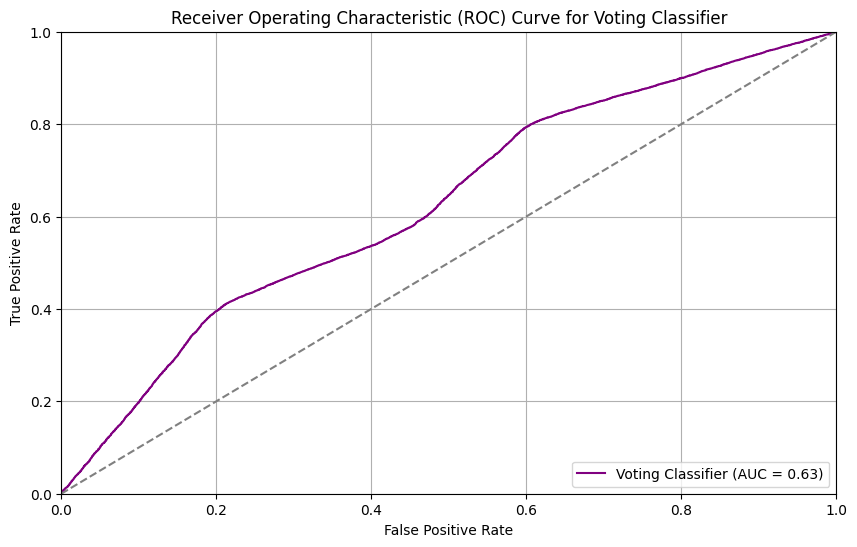

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score,
    roc_curve,
    auc,
)

# Assuming df is already defined and processed as before
# Define target column based on PaymentStatus
df["Default"] = df["PaymentStatus"].apply(
    lambda x: 1 if x in ["Pending", "Absconding", "Dead"] else 0
)

# Encode categorical columns
label_encoder = LabelEncoder()
df["CCTYPE"] = label_encoder.fit_transform(df["CCTYPE"])

# Define feature set and target variable
X = df[["CCTYPE", "TOTALSPEND%", "Max Limit", "Amount Due"]]
y = df["Default"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100
)

# Train individual classifiers
clfD = DecisionTreeClassifier(random_state=100)
clfR = RandomForestClassifier(random_state=100)
linR = LogisticRegression(random_state=100)
GaussB = GaussianNB()

# Create Voting Classifier (Soft Voting)
voting_clf = VotingClassifier(
    estimators=[
        ("decision_tree", clfD),
        ("random_forest", clfR),
        ("logistic_regression", linR),
        ("gaussian_nb", GaussB),
    ],
    voting="soft",  # Use 'hard' for hard voting
)

# Fit the Voting Classifier
voting_clf.fit(X_train, y_train)

# Predictions
y_pred_voting = voting_clf.predict(X_test)
y_pred_voting_prob = voting_clf.predict_proba(X_test)[:, 1]

# Evaluate the Voting Classifier
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_voting)}")
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_voting))
print(
    f"\nVoting Classifier Classification Report:\n{classification_report(y_test, y_pred_voting)}"
)

# Calculate ROC curve
fpr_voting, tpr_voting, _ = roc_curve(y_test, y_pred_voting_prob)
roc_auc_voting = auc(fpr_voting, tpr_voting)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(
    fpr_voting,
    tpr_voting,
    color="purple",
    label="Voting Classifier (AUC = {:.2f})".format(roc_auc_voting),
)
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve for Voting Classifier")
plt.legend(loc="lower right")
plt.grid()
plt.show()

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest Accuracy: 0.6657333333333333
Tuned Random Forest ROC AUC Score: 0.666509590191734

Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67     22529
           1       0.67      0.67      0.67     22471

    accuracy                           0.67     45000
   macro avg       0.67      0.67      0.67     45000
weighted avg       0.67      0.67      0.67     45000

XGBoost Accuracy: 0.6625333333333333
XGBoost ROC AUC Score: 0.6670014458236364

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66     22529
           1       0.66      0.66      0.66     22471

    accuracy                           0.66     45000
   macro avg       0

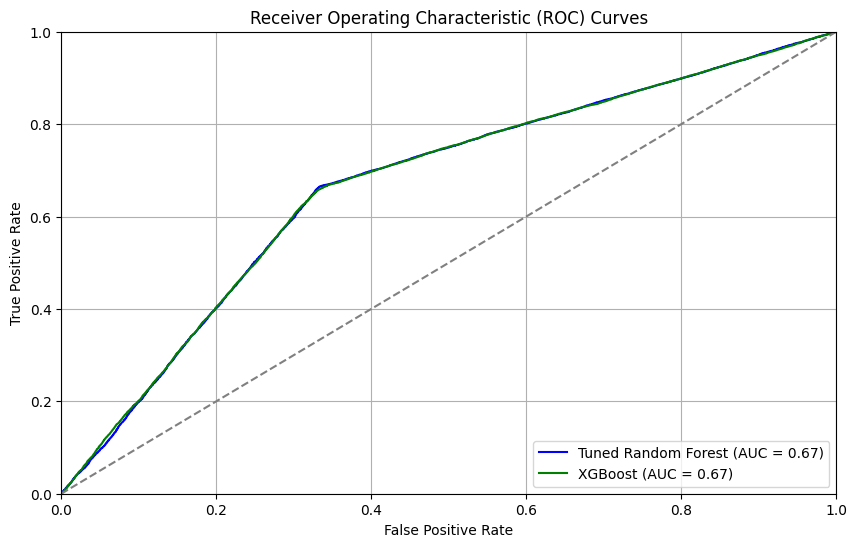

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score,
    roc_curve,
    auc,
)

# Assuming df is already defined and processed as before
# Define target column based on PaymentStatus
df["Default"] = df["PaymentStatus"].apply(
    lambda x: 1 if x in ["Pending", "Absconding", "Dead"] else 0
)

# Encode categorical columns
label_encoder = LabelEncoder()
df["CCTYPE"] = label_encoder.fit_transform(df["CCTYPE"])

# Define feature set and target variable
X = df[["CCTYPE", "TOTALSPEND%", "Max Limit", "Amount Due"]]
y = df["Default"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100
)

# Hyperparameter tuning for Random Forest
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}

rf = RandomForestClassifier(random_state=100)
grid_search = GridSearchCV(
    estimator=rf, param_grid=param_grid, cv=3, scoring="roc_auc", verbose=1
)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print(f"Best Random Forest Parameters: {grid_search.best_params_}")

# Evaluate the tuned Random Forest
y_pred_rf = best_rf.predict(X_test)
y_pred_rf_prob = best_rf.predict_proba(X_test)[:, 1]
print(f"Tuned Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("Tuned Random Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_rf_prob))
print(
    f"\nTuned Random Forest Classification Report:\n{classification_report(y_test, y_pred_rf)}"
)

# Implementing XGBoost
xgb_model = XGBClassifier(
    use_label_encoder=False, eval_metric="logloss", random_state=100
)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate XGBoost
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print("XGBoost ROC AUC Score:", roc_auc_score(y_test, y_pred_xgb_prob))
print(f"\nXGBoost Classification Report:\n{classification_report(y_test, y_pred_xgb)}")

# Plot ROC curves for both models
plt.figure(figsize=(10, 6))

# Random Forest ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(
    fpr_rf,
    tpr_rf,
    color="blue",
    label="Tuned Random Forest (AUC = {:.2f})".format(roc_auc_rf),
)

# XGBoost ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb_prob)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(
    fpr_xgb, tpr_xgb, color="green", label="XGBoost (AUC = {:.2f})".format(roc_auc_xgb)
)

# Random guessing line
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curves")
plt.legend(loc="lower right")
plt.grid()
plt.show()